<a href="https://colab.research.google.com/github/bahkali/A4Products/blob/master/Dog_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# End-to-end Multi-class Dog Bread Classification

This notebook build an end-to-end multi-class images classifier using Tensorflow 2.0 and TensorFlow Hub.

## 1. Problem

Identifying the bread of dog given an image of a dog.
when I'm sitting at the cafe and I take a phote of a dog, I want to know what bread of dog it is.

## 2. Data

The data we're using is from Kaggle's dog breed identification competition.


## 3. Evaluation

The evaluation is a file with prediction probabilities for each dog breed each test image.

## 4. Features

Some information about the data:
* We're dealing with images (unstructured data) so it's probably best we use deep learning/transfer learning. 
* There are 120 breeds of dogs (this means there are 120 different classes).
* There are around 10000 images in the training set (Images have labels)
* There are around 10000 images in the test set (Images have no labels, because we'll want to predict them).

In [11]:
# Import Tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Import Tensorflow into colab
import tensorflow as tf
import tensorflow_hub as hub
path = "drive/MyDrive/Dog Vision/dog-breed-identification"

In [12]:
print("TF version:", tf.__version__)
print("TF Hub version:", hub.__version__)
# Check for GPU 
print("GPU", "available (YESSS!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

TF version: 2.4.0
TF Hub version: 0.11.0
GPU available (YESSS!!!!)


## Getting our data ready (turning into Tensors)
With all Machine learning models, our data has to be in numerical format. Turning our image into Tensors(numerical representations).


In [17]:
#/content/drive/MyDrive/Dog Vision/dog-breed-identification
labels_csv = pd.read_csv(path+"/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     e86be20abe3ab746179728fa6f19bc59  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [18]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


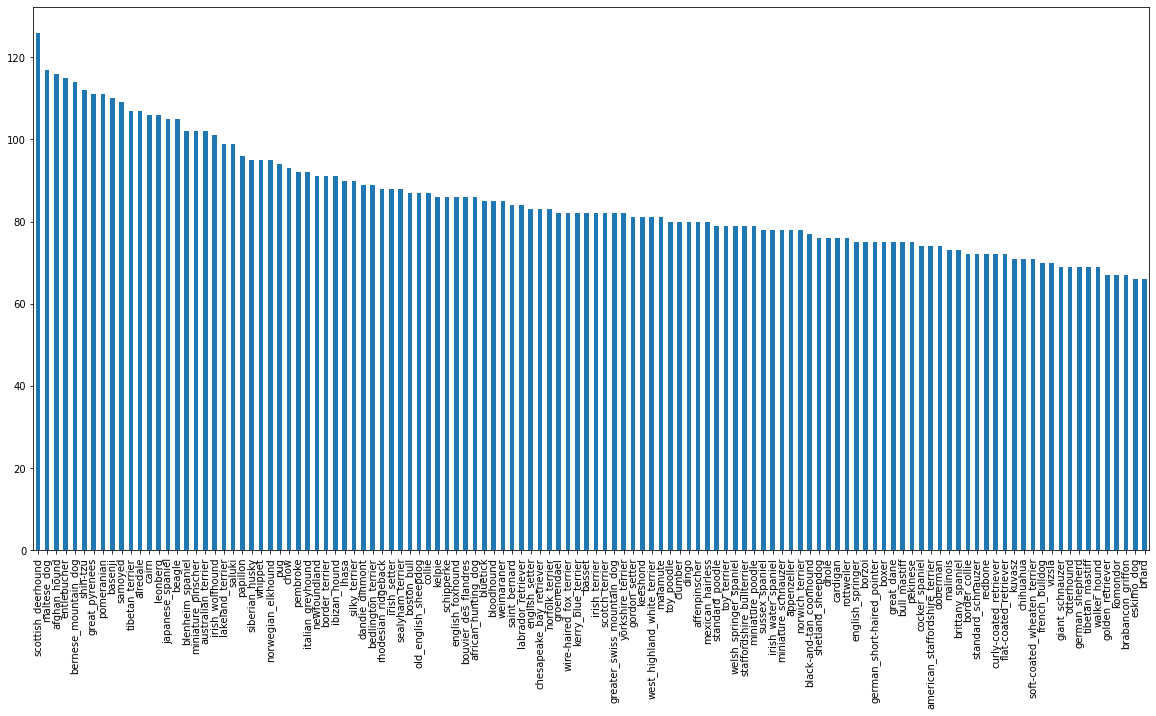

In [20]:
labels_csv['breed'].value_counts().plot.bar(figsize=(20, 10))